In [1]:
import os
import numpy as np
import scanpy as sc
import scvi

In [2]:
#multi-tissue-single-cell-tumor-atlas
dataset_url = 'https://datasets.cellxgene.cziscience.com/07405240-4f64-4dd9-83c3-b3db3405b05c.h5ad'

In [3]:
adata_path = os.path.join('data/raw', "tumor_atlas.h5ad")

adata = sc.read(
    adata_path,
    backup_url=dataset_url,
)

In [4]:
adata.obs[['tissue_type', 'disease', 'organism', 'tissue', 'batch', 'author_first_cell_type', 'author_cell_type', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue']]

,tissue_type,disease,organism,tissue,batch,author_first_cell_type,author_cell_type,cell_type,assay,disease,organism,sex,tissue
BT1299_GTACTCCTCGGAAACG-1-17,tissue,lung cancer,Homo sapiens,lung,0,Endothelial Cells,Endothelial,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGCAGGCTA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Mononuclear Phagocytes,Mac_Rec,mononuclear phagocyte,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGCATGGCA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Endothelial Cells,Endothelial,endothelial cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGGATGTAT-1-17,tissue,lung cancer,Homo sapiens,lung,0,B Cells,B_cells,B cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
BT1299_GTACTTTAGGCTCTTA-1-17,tissue,lung cancer,Homo sapiens,lung,0,Malignant Cells,lung_tumor,malignant cell,10x 3' v2,lung cancer,Homo sapiens,male,lung
...,...,...,...,...,...,...,...,...,...,...,...,...,...
P3_6_GTGCAGCTCATGTCCC-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_GTTCGGGTCGGATGGA-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_TAAGCGTTCAATCACG-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung
P3_6_TACTTACGTTGATTGC-1-3,tissue,normal,Homo sapiens,lung,0,Epithelial Cells,lung_normal,epithelial cell,10x 3' v2,normal,Homo sapiens,female,lung


In [5]:
# Filtramos apenas tissue blood and breast de 391963 total o subset ficou com ≠662 observações;
# Em sangue todas as amostras são disease normal;
# Em cancer de mama temos 2 tipos de doenças: normal e tumor; 
# Nas amostras de sangue temos 2mil amostras só parece pouco não sabemos se é o suficiente para treinar um modelo;

filtred_dataset = adata[adata.obs['tissue'].isin(['breast'])]

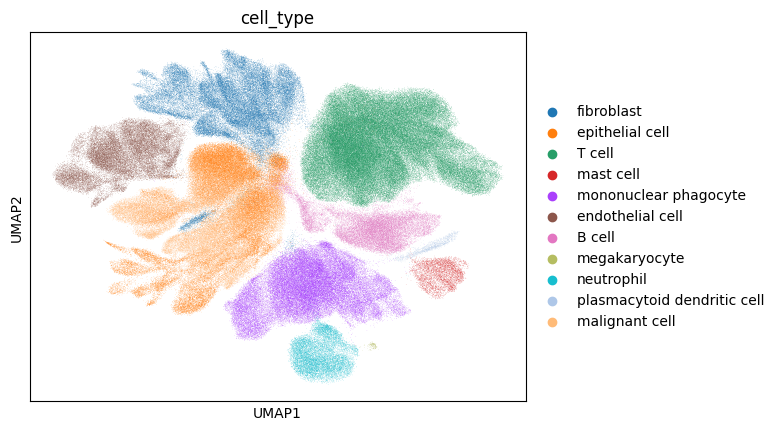

In [6]:
sc.pl.umap(adata, color="cell_type")

In [8]:
# Vamos repensar o modelo de filtragem dos dados, iremos identificar todos os autor_cell_type disponiveis nas amostras de mama, e criaremos um dataset final com todos esses tipos de celulas 
# independente do tecido de origem (validar isso eventualmente com os professores)

# adata[adata.obs['author_cell_type'] == adata[adata.obs['tissue'].isin(['breast'])].obs['author_cell_type']]

subsetadata = adata[adata.obs['author_cell_type'].isin(adata[adata.obs['tissue'] == 'breast'].obs['author_cell_type'])]

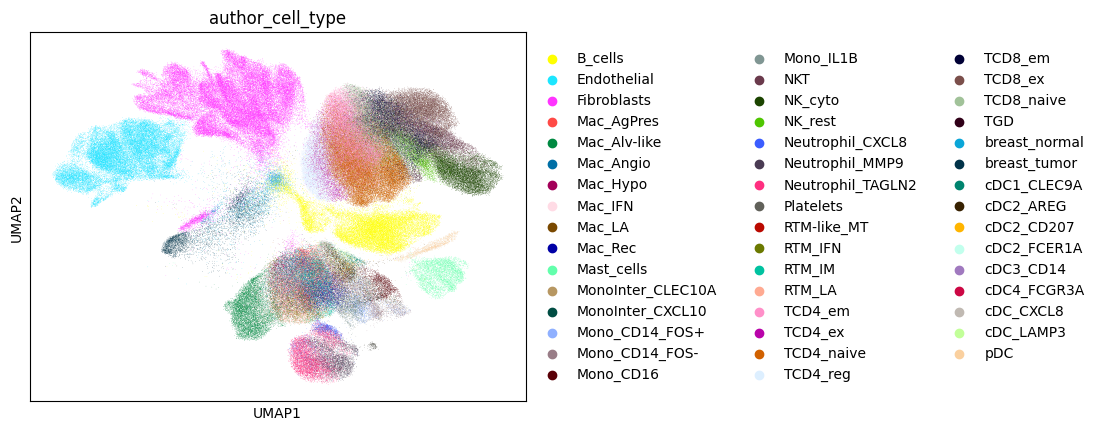

In [9]:
sc.pl.umap(subsetadata, color="author_cell_type")

In [10]:
# Os dados da mariana estão normalizados?
# Como foram anotados?

In [13]:
subsetadata.obs.columns


Index(['nCount_RNA', 'nFeature_RNA', 'harm_study', 'harm_healthy.tissue',
       'harm_tumor.site', 'harm_sample.type', 'harm_condition',
       'harm_tumor.type', 'harm_cd45pos', 'harm_healthy.pat', 'percent.mt',
       'ratio_nCount_nFeature', 'batch', 'X_scvi_batch', 'X_scvi_labels',
       'X_scvi_local_l_mean', 'X_scvi_local_l_var', 'leiden_0.2', 'leiden_0.4',
       'leiden_0.6', 'leiden_0.8', 'leiden_1', 'leiden_1.2', 'leiden_1.4',
       'author_first_cell_type', 'author_cell_type', 'cnv_score',
       'organism_ontology_term_id', 'donor_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id',
       'tissue_ontology_term_id', 'cell_type_ontology_term_id',
       'suspension_type', 'assay_ontology_term_id', 'is_primary_data',
       'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_

In [14]:
subsetadata.obs[['batch', 'X_scvi_batch', 'X_scvi_labels', 'author_cell_type']]

,batch,X_scvi_batch,X_scvi_labels,author_cell_type
BT1299_GTACTCCTCGGAAACG-1-17,0,65,0,Endothelial
BT1299_GTACTTTAGCAGGCTA-1-17,0,65,0,Mac_Rec
BT1299_GTACTTTAGCATGGCA-1-17,0,65,0,Endothelial
BT1299_GTACTTTAGGATGTAT-1-17,0,65,0,B_cells
BT1299_GTACTTTAGTCCATAC-1-17,0,65,0,B_cells
...,...,...,...,...
P3_7_AACACGTGTCGAGATG-1-3,0,17,0,NK_cyto
P3_7_GAAGCAGAGTGTGAAT-1-3,0,17,0,NK_cyto
P3_7_GCGCAACCAAGGTTTC-1-3,0,17,0,NK_cyto
P3_7_GTGGGTCGTAAGTAGT-1-3,0,17,0,NK_cyto


In [20]:
subsetadata.obs['batch'].unique()


[0, 1, 7, 6, 3, 8, 5, 2, 4]
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]

In [21]:
subsetadata.obs['X_scvi_batch'].unique()


array([ 65,  61,  68,  59,  58,  43,  44,  46,  17, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 147, 143, 146, 145, 148, 144,  23,  25,  18,
        27,  24,  20,  28,  21,  22,  19,  26,  29,  30,  36,  35,  34,
        33,  32,  31,  86,  81,  82,  83,  84,  85,  80,  67,  64,  54,
        57,  55,  56,  70,  74,  73,  71,  72,  79,  77,  75,  76,  78,
        95,  11,  12,  13,  14,  15,  87,  88,  89,  90, 102, 103, 107,
       105,  98,  91,  92,  93,  94,   8,   1,  10,   7,   4,   5,   3,
        60,  62,  69,  66,  63, 100,  96,  39,  38,  45,  50,  41,  42,
        48,  49,  37,  40,  47,  52,  51,  53,  97,  99, 106, 101, 104,
         6,   0,   9,   2,  16])

In [25]:
# Teste dos modelos de rotulação

subsetadata = subsetadata.copy()

In [29]:
# Qual chave de batch_key .obs['batch'] ou .obs['X_scvi_batch']
scvi.model.SCANVI.setup_anndata(subsetadata, batch_key="batch", labels_key="author_cell_type", unlabeled_category="unlabeled")

[03/07/25 21:45:48] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=609795;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=11394;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/data/fields/_ba                
                             se_field.py:63: UserWarning: adata.X does not contain unnormalized                    
                             count data. Are you sure this is what you want?                                       
                               self.validate_field(adata)                                                          
                                                                                                                   

In [33]:
vae = scvi.model.SCANVI(subsetadata)
vae.train()

INFO     Training for 27 epochs.                                                                                   


[03/07/25 21:46:23] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=738956;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=965118;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/train/_trainrun                
                             ner.py:69: UserWarning: `accelerator` has been automatically set to                   
                             `cpu` although 'mps' exists. If you wish to run on mps backend, use                   
                             explicitly accelerator=='mps' in train function.In future releases it                 
                             will become default for mps supported machines.                                       
                               accelerator, lightning_devices, device = parse_device_args(                         
                                                                                                                   

INFO: GPU available: True (mps), used: False


                    INFO     GPU available: True (mps), used: False                                 ]8;id=788562;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=387229;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: TPU available: False, using: 0 TPU cores


                    INFO     TPU available: False, using: 0 TPU cores                               ]8;id=306019;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=231127;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

INFO: HPU available: False, using: 0 HPUs


                    INFO     HPU available: False, using: 0 HPUs                                    ]8;id=924095;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=834981;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\

                    WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=247185;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=111690;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning/pytorch/tr                
                             ainer/setup.py:177: GPU available but not used. You can set it by                     
                             doing `Trainer(accelerator='gpu')`.                                                   
                                                                                                                   

[03/07/25 21:46:24] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=534300;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=710922;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning/pytorch/tr                
                             ainer/connectors/data_connector.py:425: The 'train_dataloader' does                   
                             not have many workers which may be a bottleneck. Consider increasing                  
                             the value of the `num_workers` argument` to `num_workers=10` in the                   
                             `DataLoader` to improve performance.                                                  
                                                                                                                   

Training:   0%|          | 0/27 [00:00<?, ?it/s]

                    WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=578895;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=250186;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/module/_scanvae                
                             .py:305: UserWarning: The value argument must be within the support of                
                             the distribution                                                                      
                               reconst_loss = -px.log_prob(x).sum(-1)                                              
                                                                                                                   

[03/07/25 21:46:26] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=529847;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=183431;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/module/_scanvae                
                             .py:305: UserWarning: The value argument must be within the support of                
                             the distribution                                                                      
                               reconst_loss = -px.log_prob(x).sum(-1)                                              
                                                                                                                   

[03/07/25 21:54:31] WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=345844;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=410325;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/module/_scanvae                
                             .py:305: UserWarning: The value argument must be within the support of                
                             the distribution                                                                      
                               reconst_loss = -px.log_prob(x).sum(-1)                                              
                                                                                                                   

                    WARNING  /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-pro ]8;id=409557;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=695890;file:///opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             ject-McUDH8AL-py3.13/lib/python3.13/site-packages/scvi/module/_scanvae                
                             .py:305: UserWarning: The value argument must be within the support of                
                             the distribution                                                                      
                               reconst_loss = -px.log_prob(x).sum(-1)                                              
                                                                                                                   

INFO: 
Detected KeyboardInterrupt, attempting graceful shutdown ...


[03/07/25 22:01:09] INFO                                                                            ]8;id=616763;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=755370;file:///Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/python3.13/site-packages/lightning_utilities/core/rank_zero.py#63\63]8;;\
                             Detected KeyboardInterrupt, attempting graceful shutdown ...                          

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/p │
│ ython3.13/site-packages/lightning/pytorch/trainer/call.py:47 in _call_and_handle_interrupt       │
│                                                                                                  │
│    44 │   try:                                                                                   │
│    45 │   │   if trainer.strategy.launcher is not None:                                          │
│    46 │   │   │   return trainer.strategy.launcher.launch(trainer_fn, *args, trainer=trainer,    │
│ ❱  47 │   │   return trainer_fn(*args, **kwargs)                                                 │
│    48 │                                                                                          │
│    49 │   except _TunerExitException:                                                            │
│    50 │   │   _call_teardown_hook(trainer)                                                       │
│                                                                                                  │
│ /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/p │
│ ython3.13/site-packages/lightning/pytorch/trainer/trainer.py:575 in _fit_impl                    │
│                                                                                                  │
│    572 │   │   │   model_provided=True,                                                          │
│    573 │   │   │   model_connected=self.lightning_module is not None,                            │
│    574 │   │   )                                                                                 │
│ ❱  575 │   │   self._run(model, ckpt_path=ckpt_path)                                             │
│    576 │   │                                                                                     │
│    577 │   │   assert self.state.stopped                                                         │
│    578 │   │   self.training = False                                                             │
│                                                                                                  │
│ /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/p │
│ ython3.13/site-packages/lightning/pytorch/trainer/trainer.py:982 in _run                         │
│                                                                                                  │
│    979 │   │   # ----------------------------                                                    │
│    980 │   │   # RUN THE TRAINER                                                                 │
│    981 │   │   # ----------------------------                                                    │
│ ❱  982 │   │   results = self._run_stage()                                                       │
│    983 │   │                                                                                     │
│    984 │   │   # ----------------------------                                                    │
│    985 │   │   # POST-Training CLEAN UP                                                          │
│                                                                                                  │
│ /Users/victor.apolonio/Library/Caches/pypoetry/virtualenvs/hexcore-project-McUDH8AL-py3.13/lib/p │
│ ython3.13/site-packages/lightning/pytorch/trainer/trainer.py:1026 in _run_stage                  │
│                                                                                                  │
│   1023 │   │   │   with isolate_rng():                                                           │
│   1024 │   │   │   │   self._run_sanity_check()                                                  │
│   1025 │   │   │   with torch.autograd.set_detect_anomaly(s

In [27]:
help(scvi.model.SCANVI)

Help on class SCANVI in module scvi.model._scanvi:

class SCANVI(scvi.model.base._rnamixin.RNASeqMixin, scvi.model.base._vaemixin.VAEMixin, scvi.model.base._archesmixin.ArchesMixin, scvi.model.base._base_model.BaseMinifiedModeModelClass)
 |  SCANVI(
 |      adata: 'AnnData',
 |      n_hidden: 'int' = 128,
 |      n_latent: 'int' = 10,
 |      n_layers: 'int' = 1,
 |      dropout_rate: 'float' = 0.1,
 |      dispersion: "Literal['gene', 'gene-batch', 'gene-label', 'gene-cell']" = 'gene',
 |      gene_likelihood: "Literal['zinb', 'nb', 'poisson']" = 'zinb',
 |      linear_classifier: 'bool' = False,
 |      **model_kwargs
 |  )
 |
 |  Single-cell annotation using variational inference :cite:p:`Xu21`.
 |
 |  Inspired from M1 + M2 model, as described in (https://arxiv.org/pdf/1406.5298.pdf).
 |
 |  Parameters
 |  ----------
 |  adata
 |      AnnData object that has been registered via :meth:`~scvi.model.SCANVI.setup_anndata`.
 |  n_hidden
 |      Number of nodes per hidden layer.
 |  n_lat